# GenAI with Python: Agents

- Large Language Model
- Prompt Engineering
- Tools
- Routing
- Typensicherheit
- LangGraph

In [1]:
#pip install groq
#pip install langchain --> 0.2.14
#pip install duckduckgo-search --> 6.2.12
#pip install instructor pydantic

# Large Language Model

In [2]:
from groq import Groq

# Groq API Key
groq_api_key = "your_groq_key"

# Initialisiere Groq client
client = Groq(api_key=groq_api_key)

# Modelname
model_name = "llama3-8b-8192"

# Rollenvergabe für Konversation
messages = [
    {"role": "system", "content": "You are a knowledgeable assistant."},
    {"role": "user", "content": "Where did Bashar flee from Syria in December 2024?"}
]



Bei der Interaktion mit einem LLM-Chatbot gibt es drei Rollen:

„role": ‚system‘ - wird verwendet, um dem Modell Kernanweisungen zu übermitteln, wie die Konversation verlaufen soll  
„Rolle": ‚user‘ - wird für die Fragen des Benutzers verwendet  
„Rolle": ‚assistant‘ - ist die Antwort des Modells  

In [3]:
# Groq chat completion API
response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=200,  # Token limit je nach Use Case anpassen
    temperature=0.7,  # von 0 - 1, je höher desto kreativer
    top_p=1.0  # Nucleus sampling steuert zusätzlich die Variabilität der Ausgabe, ähnlich zu Temperature. Es bestimmt, wie viele der wahrscheinlichsten nächsten Token für die Generierung 
    #berücksichtigt werden. Bei 1 werden alle möglichen Token berücksichtigt. Je kleiner top_p, desto deterministischer und weniger kreativ wird die Antwort
)

# Output the response
print("Assistant Response:", response.choices[0].message.content) # Groq API liefert Antworten in einer Liste von möglichen Optionen (Choices) zurück. Das erlaubt es, mehrere Antwortvarianten zu generieren,
#falls gewünscht.


Assistant Response: I think there may be some confusion. As of December 2024, Bashar al-Assad is still the President of Syria, and there has been no credible information or reports of him fleeing the country. It's possible that you may be referring to a different event or scenario. If you have any more context or clarification, I'd be happy to help.


# Prompt Engineering
### Chain of Thought

Beinhaltet die Erstellung eines schrittweisen Argumentationsprozesses, um zu einer Schlussfolgerung zu gelangen. Das Modell wird zum „lauten Denken“ angeregt, indem die logischen Schritte, die zur endgültigen Antwort führen, explizit dargelegt werden.

In [4]:
# Prompt Engineering
messages = [
    {"role": "system", "content": "You are an assistant who reasons step by step before answering any question. Always explain your reasoning clearly before providing a final answer."},
    {"role": "user", "content": "Where did Bashar flee from Syria in December 2024? Please reason step by step before providing the answer."}
]

response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=400,  
    temperature=0.7,  
    top_p=1.0
)

# Output the response
print("Response with Chain of Thought reasoning:")
print(response.choices[0].message.content)


Response with Chain of Thought reasoning:
I'd like to clarify that Bashar al-Assad is the current President of Syria, and I'll provide a step-by-step reason before answering your question.

Step 1: Check the current date
Since you mentioned December 2024, I'll assume we're talking about a hypothetical scenario in the future. However, I'll proceed with the question as if the information is accurate.

Step 2: Verify Bashar al-Assad's whereabouts in December 2024
Bashar al-Assad has been the President of Syria since 2000, and as far as my knowledge cutoff is concerned, there has been no credible information suggesting he has fled the country.

Step 3: Consider the possibility of a hypothetical scenario
If we assume that Bashar al-Assad did flee Syria in December 2024, I would need more context or credible sources to determine his exact location.

Step 4: Provide an answer based on the available information
Since there is no credible information or evidence suggesting Bashar al-Assad fled 

### Langchain

Langchain ist ideal für die Erstellung umfangreicher LLM-gestützter Anwendungen, die komplexe Interaktionen und Arbeitsabläufe erfordern. Es bietet eine umfassende Reihe von Tools, die sich auf die Erstellung komplexer Arbeitsabläufe konzentrieren. Es basiert auf einer „Kette von Komponenten“, die verschiedene Verarbeitungsschritte ermöglicht, wobei jeder Schritt verschiedene LLMs beinhalten kann.  
Wir nutzen die von der Community zur Verfügung gestellte Bibliothek für die Internetsuche mittels DuckDuckGo.

In [5]:
from langchain_community.tools import DuckDuckGoSearchRun  # Importiert das DuckDuckGo-Suchwerkzeug aus LangChain
import json  # Importiert das JSON-Modul zur Formatierung und Verarbeitung von Daten

def search_duckduckgo(query: str):
    """
    Durchführen einer Suche bei DuckDuckGo mithilfe des LangChain DuckDuckGoSearchRun-Tools.
    
    Parameter:
        query (str): Die Suchanfrage, die an DuckDuckGo gesendet wird.
        
    Rückgabewert:
        str: Ein JSON-String, der entweder das Ergebnis oder eine Fehlermeldung enthält.
    """
    try:
        # Erstelle eine Instanz des DuckDuckGo-Suchtools
        search_tool = DuckDuckGoSearchRun()
        
        # Führe die Suche mit der angegebenen Anfrage aus
        result = search_tool.run(query)
        
        # Gib das Ergebnis als JSON-String zurück
        return json.dumps({"result": result})
    except Exception as e:
        # Bei einem Fehler wird die Fehlermeldung als JSON zurückgegeben
        return json.dumps({"error": f"An error occurred: {str(e)}"})

# Testfall-Funktion zum Testen der DuckDuckGo-Suche
def test_search_duckduckgo():
    # Eine Liste von Test-Suchanfragen
    test_queries = [
        "Where did Bashar flee from Syria in December 2024?"  # Beispielhafte Suchanfrage
    ]

    # Iteriere durch alle Test-Suchanfragen und teste die Funktion
    for query in test_queries:
        print(f"Testing query: {query}")  # Zeige die aktuelle Testanfrage an
        
        # Führe die Suche aus und erhalte das Ergebnis
        result = search_duckduckgo(query)
        
        # Parsen des Ergebnisses aus dem JSON-Format
        parsed_result = json.loads(result)
        
        # Zeige das Ergebnis der Suche an
        print("Result:", parsed_result)
        print("-" * 50)  # Trennlinie zur Übersichtlichkeit

# Aufruf der Testfunktion
test_search_duckduckgo()


Testing query: Where did Bashar flee from Syria in December 2024?
Result: {'result': "Ousted Syrian President Bashar Assad flees to parts unknown as rebels declare country is 'free of the tyrant' ... By Bill Hutchinson. December 8, 2024, 2:40 PM. 3:30. ... Syria, Dec. 8, 2024. Published On 8 Dec 2024 8 Dec 2024 In the early hours of Sunday morning, opposition forces declared Syria liberated from the rule of President Bashar al-Assad as opposition forces surged into the ... — Thomas van Linge (@ThomasVLinge) December 8, 2024 'Syria is free': By 6am on December 8, the fighters declared Damascus liberated, confirming that Bashar al-Assad had fled the country. Syrian President Bashar al-Assad arrived in Russia on Sunday after rebels seized control of Damascus, Russian state media said—a pivotal moment in the years-long civil war against the regime ... A giant banner of Syrian President Bashar Assad hangs on the facade of a building, as pedestrian walk through an the empty streets of Damasc

# Tools

In [6]:
import json  

def calculate(expression):
    """
    Verarbeite einen mathematischen Ausdruck und gebe das Ergebnis im JSON-Format zurück.
    :param expression: Ein mathematischer Ausdruck als Zeichenkette (String)
    :return: JSON-Darstellung des Ergebnisses oder einer Fehlermeldung
    """
    try:
        result = eval(expression)  # Berechne den mathematischen Ausdruck mit eval()
        return json.dumps({"result": result})  # Gib das Ergebnis als JSON aus
    except:
        # Bei einem Fehler (z.B. ungültiger Ausdruck) gib eine Fehlermeldung zurück
        return json.dumps({"error": "Invalid expression"})


In [7]:
def run_conversation(user_prompt):
    # Initialisiere die Konversation mit system- und user-Nachrichten
    messages=[
        {
            "role": "system",  # Rolle des Systems, das als Rechner-Assistent fungiert
            "content": "You are a calculator assistant. Use the calculate function to perform mathematical operations and provide the results."
        },
        {
            "role": "user",  # Rolle des Benutzers, der eine Eingabe macht
            "content": user_prompt,  # Benutzer-Prompt als Inhalt
        }
    ]
    # Definiere das vorhandene Tool, das für die Berechnung verwendet wird
    tools = [
        {
            "type": "function",  # Typ des Tools: eine Funktion
            "function": {
                "name": "calculate",  # Name der zu verwendenden Funktion
                "description": "Evaluate a mathematical expression",  # Beschreibung des Tools
                "parameters": {  # Parameter, die an die Funktion übergeben werden
                    "type": "object",  # Typ des Parameters: ein Objekt
                    "properties": {
                        "expression": {
                            "type": "string",  # Der Ausdruck muss als Zeichenkette vorliegen
                            "description": "The mathematical expression to evaluate",  # Beschreibung des Parameters
                        }
                    },
                    "required": ["expression"],  # Der Parameter "expression" ist erforderlich
                },
            },
        }
    ]

    # Initial Groq API Aufruf
    response = client.chat.completions.create(
        model=model, 
        messages=messages, # Konversationshistorie
        stream=False,
        tools=tools, 
        tool_choice="auto", # Das LLM entscheidet welche Tools verwendet werden
        max_tokens=4096 # Maximum Tokens für die Antwort
    )
    # Extrahiert die Antwort und alle Toolaufrufe
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls
    if tool_calls:
        # Definiere die verfügbaren Tools, die vom LLM aufgerfufen werden können
        available_functions = {
            "calculate": calculate,
        }
        # Füge die LLM Antwort der Konversation hinzu
        messages.append(response_message)

        # Verarbeite jeden Toolaufruf
        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions[function_name]
            function_args = json.loads(tool_call.function.arguments)
            # Toolaufruf und Antwort erhalten
            function_response = function_to_call(
                expression=function_args.get("expression")
            )
            # Toolantwort der Konversation hinzufügen
            messages.append(
                {
                    "tool_call_id": tool_call.id, 
                    "role": "tool", # Indiziert die Toolverwendung
                    "name": function_name,
                    "content": function_response,
                }
            )
        # Zweiter API Aufruf inkl. aktualisierter Konversation
        second_response = client.chat.completions.create(
            model=model,
            messages=messages
        )
        # Liefern der finalen Antwort
        return second_response.choices[0].message.content



In [8]:
model = "llama3-8b-8192"
user_prompt = "What is 25 * 4 + 10?"
print(run_conversation(user_prompt))

It looks like I've done the calculation!

According to the calculation, 25 multiplied by 4 is 100. Then, adding 10 to that result gives us... 110!


In [9]:
user_prompt = "Hello"
print(run_conversation(user_prompt))

I apologize for the mistake! It seems like I need to redefine my purpose.

Hello! I'm a calculator assistant. I can help you perform mathematical calculations. You can ask me a math problem, and I'll do my best to solve it.

What kind of calculation would you like to do? Addition, subtraction, multiplication, division, or something more complex like exponentiation, roots, or trigonometry?


# Routing

Im Folgenden erweitern wir das Berechnungsprogramm, so dass ein Routing-System unsere Anfrage an Llama 3 70B weiterleitet, wenn die Benutzeranfrage das Tool nicht benötigt  
Dieses Routing basiert auf LLM basiertem "Reasoning und Action (ReAct)" und entspricht der Funktionsweise eines Agenten.

In [10]:
import json

# Definiere Modelle
ROUTING_MODEL = "llama3-70b-8192"
TOOL_USE_MODEL = "llama3-groq-70b-8192-tool-use-preview"
GENERAL_MODEL = "llama3-70b-8192"



In [11]:
def calculate(expression):
    """Verarbeite einen mathematischen Ausdruck"""
    try:
        result = eval(expression)
        return json.dumps({"result": result})
    except:
        return json.dumps({"error": "Invalid expression"})

In [12]:
def route_query(query):
    """Routing-Logik, um LLM entscheiden zu lassen, ob Tools benötigt werden"""
    routing_prompt = f"""
    Given the following user query, determine if any tools are needed to answer it.
    If a calculation tool is needed, respond with 'TOOL: CALCULATE'.
    If no tools are needed, respond with 'NO TOOL'.

    User query: {query}

    Response:
    """
    
    response = client.chat.completions.create(
        model=ROUTING_MODEL,
        messages=[
            {"role": "system", "content": "You are a routing assistant. Determine if tools are needed based on the user query."},
            {"role": "user", "content": routing_prompt}
        ],
        max_tokens=20  # Kurze Antwort reicht aus
    )
    
    routing_decision = response.choices[0].message.content.strip()
    
    if "TOOL: CALCULATE" in routing_decision:
        return "calculate tool needed"
    else:
        return "no tool needed"

In [13]:
def run_with_tool(query):
    """Tool, damit das Modell eine Berechnung ausführen kann."""
    
    # Definiere die Nachrichten für das Modell. Das Modell wird als Taschenrechner-Assistent eingesetzt.
    messages = [
        {
            "role": "system",
            "content": "You are a calculator assistant. Use the calculate function to perform mathematical operations and provide the results.",
        },
        {
            "role": "user",
            "content": query,  # Die Benutzeranfrage, z.B. eine mathematische Formel.
        }
    ]
    
    # Definiere die Tools, die das Modell verwenden kann.
    tools = [
        {
            "type": "function",  # Gibt an, dass es sich um eine Funktion handelt.
            "function": {
                "name": "calculate",  # Name der zu verwendenden Funktion.
                "description": "Evaluate a mathematical expression",  # Beschreibung der Funktion.
                "parameters": {  # Parameter, die für die Funktion benötigt werden.
                    "type": "object",
                    "properties": {
                        "expression": {  # Der Parameter "expression" wird als mathematische Formel übergeben.
                            "type": "string",
                            "description": "The mathematical expression to evaluate",
                        }
                    },
                    "required": ["expression"],  # Der Parameter "expression" ist zwingend erforderlich.
                },
            },
        }
    ]
    
    # Anfrage an das Modell senden: LLM bestimmt, ob ein Tool (calculate) verwendet werden soll.
    response = client.chat.completions.create(
        model=TOOL_USE_MODEL,  # Modell, das Tools nutzen kann.
        messages=messages,  # Die Konversation, inklusive System- und Benutzernachrichten.
        tools=tools,  # Die definierten Tools (hier: "calculate").
        tool_choice="auto",  # Das Modell entscheidet automatisch, ob das Tool verwendet wird.
        max_tokens=4096  # Maximale Anzahl der Tokens für die Antwort.
    )
    
    # Extrahiere die Antwort des Modells aus der API-Antwort.
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls  # Tool-Aufrufe, die vom Modell bestimmt wurden.

    # Prüfen, ob ein Tool-Aufruf erforderlich ist.
    if tool_calls:
        messages.append(response_message)  # Füge die Antwort des Modells zu den Nachrichten hinzu.
        
        # Verarbeite jeden Tool-Aufruf.
        for tool_call in tool_calls:
            # Lade die Argumente, die das Modell an die Funktion übergeben möchte.
            function_args = json.loads(tool_call.function.arguments)
            # Führe die berechnete Funktion aus und hole das Ergebnis.
            function_response = calculate(function_args.get("expression"))
            
            # Füge die Antwort des Tools zur Nachrichtenhistorie hinzu.
            messages.append(
                {
                    "tool_call_id": tool_call.id,  # ID des Tool-Aufrufs
                    "role": "tool",  # Rolle des Tools
                    "name": "calculate",  # Name des aufgerufenen Tools
                    "content": function_response,  # Ergebnis der Berechnung
                }
            )
        
        # Starte eine zweite Anfrage mit aktualisierter Nachrichtenhistorie,
        # damit das Modell die endgültige Antwort generieren kann.
        second_response = client.chat.completions.create(
            model=TOOL_USE_MODEL,
            messages=messages
        )
        return second_response.choices[0].message.content  # Rückgabe der endgültigen Antwort.
    
    # Falls keine Tool-Aufrufe erforderlich waren, Rückgabe der ursprünglichen Antwort.
    return response_message.content


In [14]:
def run_general(query):
    """Verwende das allgemeine Modell, um die Anfrage zu beantworten, wenn kein Tool benötigt wird."""
    
    # Anfrage an das Modell senden. Es werden allgemeine Informationen ohne Tool-Aufrufe generiert.
    response = client.chat.completions.create(
        model=GENERAL_MODEL,  # Das allgemeine Modell, das keine Tools verwendet.
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},  # Systemrolle: Modellverhalten definieren
            {"role": "user", "content": query}  # Benutzeranfrage an das Modell
        ]
    )
    
    # Extrahiere die Antwort des Modells aus der API-Antwort.
    return response.choices[0].message.content  # Rückgabe der Antwort des Modells


In [15]:
def process_query(query):
    """Verarbeite die Anfrage und leite sie an das entsprechende Modell weiter"""
    
    # Routenentscheidung: Bestimme, welches Modell oder Tool verwendet werden soll.
    route = route_query(query)  # Die Funktion 'route_query' analysiert die Anfrage und gibt die Route zurück.
    
    # Überprüfe die Routing-Entscheidung:
    if route == "calculate":  # Falls die Entscheidung lautet, ein Berechnungstool zu verwenden
        response = run_with_tool(query)  # Führe das Berechnungstool aus, um die Anfrage zu beantworten.
    else:
        response = run_general(query)  # Andernfalls verwende das allgemeine Modell zur Beantwortung der Anfrage.
    
    # Rückgabe eines Dictionaries mit:
    # 1. Der ursprünglichen Anfrage (query)
    # 2. Der gewählten Route (route: "calculate" oder "no tool needed")
    # 3. Der generierten Antwort (response)
    return {
        "query": query,
        "route": route,
        "response": response
    }

In [16]:
queries = [
    "What is the capital of the Netherlands?",
    "Calculate 25 * 4 + 10"
]

for query in queries:
    result = process_query(query)
    print(f"Query: {result['query']}")
    print(f"Route: {result['route']}")
    print(f"Response: {result['response']}\n")

Query: What is the capital of the Netherlands?
Route: no tool needed
Response: The capital of the Netherlands is Amsterdam!

Query: Calculate 25 * 4 + 10
Route: calculate tool needed
Response: To calculate this, I'll follow the order of operations (PEMDAS):

1. Multiply 25 and 4: 25 * 4 = 100
2. Add 10 to the result: 100 + 10 = 110

So the final answer is 110!



### Zusammenführung des Programms in einer Zelle

In [17]:
from groq import Groq
import json
import requests
from langchain_community.tools import DuckDuckGoSearchRun


# Define models
ROUTING_MODEL = "llama3-70b-8192"
TOOL_USE_MODEL = "llama3-groq-70b-8192-tool-use-preview"
GENERAL_MODEL = "llama3-70b-8192"


# Use LangChain's DuckDuckGoSearchRun tool
def search_duckduckgo(query: str):
    """Search DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    try:
        search_tool = DuckDuckGoSearchRun()
        result = search_tool.run(query)
        return json.dumps({"result": result})
    except Exception as e:
        return json.dumps({"error": f"An error occurred: {str(e)}"})

def route_query(query):
    """Routing logic to let LLM decide if a search tool is needed."""
    routing_prompt = f"""
    Given the following user query, determine if any tools are needed to answer it.
    If a search tool is needed, respond with 'TOOL: SEARCH'.
    If no tools are needed, respond with 'NO TOOL'.

    User query: {query}

    Response:
    """
    
    response = client.chat.completions.create(
        model=ROUTING_MODEL,
        messages=[
            {"role": "system", "content": "You are a routing assistant. Determine if tools are needed based on the user query."},
            {"role": "user", "content": routing_prompt}
        ],
        max_tokens=20
    )
    
    routing_decision = response.choices[0].message.content.strip()
    
    if "TOOL: SEARCH" in routing_decision:
        return "search tool needed"
    else:
        return "no tool needed"

def run_with_tool(query):
    """Use the DuckDuckGo tool to perform the search."""
    messages = [
        {
            "role": "system",
            "content": "You are a search assistant. Use the search function to fetch results and provide answers.",
        },
        {
            "role": "user",
            "content": query,
        }
    ]
    tools = [
        {
            "type": "function",
            "function": {
                "name": "search_duckduckgo",
                "description": "Search DuckDuckGo for answers to a query.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "The search query to look up on DuckDuckGo.",
                        }
                    },
                    "required": ["query"],
                },
            },
        }
    ]
    response = client.chat.completions.create(
        model=TOOL_USE_MODEL,
        messages=messages,
        tools=tools,
        tool_choice="auto",
        max_tokens=4096
    )
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls
    if tool_calls:
        messages.append(response_message)
        for tool_call in tool_calls:
            function_args = json.loads(tool_call.function.arguments)
            function_response = search_duckduckgo(function_args.get("query"))
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": "search_duckduckgo",
                    "content": function_response,
                }
            )
        second_response = client.chat.completions.create(
            model=TOOL_USE_MODEL,
            messages=messages
        )
        return second_response.choices[0].message.content
    return response_message.content

def run_general(query):
    """Use the general model to answer the query since no tool is needed."""
    response = client.chat.completions.create(
        model=GENERAL_MODEL,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": query}
        ]
    )
    return response.choices[0].message.content

def process_query(query):
    """Process the query and route it to the appropriate model."""
    route = route_query(query)
    if route == "search tool needed":
        response = run_with_tool(query)
    else:
        response = run_general(query)
    
    return {
        "query": query,
        "route": route,
        "response": response
    }

if __name__ == "__main__":
    queries = [
        "What is the capital of the Netherlands?",
        "Where did Bashar flee from Syria in December 2024"
    ]
    
    for query in queries:
        result = process_query(query)
        print(f"Query: {result['query']}")
        print(f"Route: {result['route']}")
        print(f"Response: {result['response']}\n")



Query: What is the capital of the Netherlands?
Route: no tool needed
Response: The capital of the Netherlands is Amsterdam!

Query: Where did Bashar flee from Syria in December 2024
Route: search tool needed
Response: It seems there was an error in fetching the information. Could you please provide more details or clarify the question?



### Eingabemaske

In [18]:
import json
from groq import Groq
from langchain_community.tools import DuckDuckGoSearchRun

# Definiere Modelle
ROUTING_MODEL = "llama3-70b-8192"
TOOL_USE_MODEL = "llama3-groq-70b-8192-tool-use-preview"
GENERAL_MODEL = "llama3-70b-8192"

# DuckDuckGo-Tool
def search_duckduckgo(query: str):
    """Verwende das DuckDuckGo-Tool für eine Suchanfrage."""
    try:
        search_tool = DuckDuckGoSearchRun()
        result = search_tool.run(query)
        return json.dumps({"result": result})
    except Exception as e:
        return json.dumps({"error": f"Ein Fehler ist aufgetreten: {str(e)}"})

def route_query(query):
    """Routing-Logik zur Bestimmung, ob Tools verwendet werden sollen."""
    routing_prompt = f"""
    Given the following user query, determine if any tools are needed to answer it.
    If a search tool is needed, respond with 'TOOL: SEARCH'.
    If no tools are needed, respond with 'NO TOOL'.

    User query: {query}

    Response:
    """
    response = client.chat.completions.create(
        model=ROUTING_MODEL,
        messages=[
            {"role": "system", "content": "You are a routing assistant."},
            {"role": "user", "content": routing_prompt}
        ],
        max_tokens=20
    )
    routing_decision = response.choices[0].message.content.strip()
    return "search tool needed" if "TOOL: SEARCH" in routing_decision else "no tool needed"

def run_with_tool(query):
    """Führe das DuckDuckGo-Tool aus, falls erforderlich."""
    messages = [
        {"role": "system", "content": "You are a search assistant."},
        {"role": "user", "content": query},
    ]
    tools = [
        {
            "type": "function",
            "function": {
                "name": "search_duckduckgo",
                "description": "Search DuckDuckGo for answers to a query.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {"type": "string", "description": "The search query."},
                    },
                    "required": ["query"],
                },
            },
        }
    ]
    response = client.chat.completions.create(
        model=TOOL_USE_MODEL,
        messages=messages,
        tools=tools,
        tool_choice="auto",
        max_tokens=4096
    )
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls

    if tool_calls:
        messages.append(response_message)
        for tool_call in tool_calls:
            function_args = json.loads(tool_call.function.arguments)
            function_response = search_duckduckgo(function_args.get("query"))
            messages.append(
                {
                    "role": "tool",
                    "content": str(function_response),
                    "tool_call_id": tool_call.id,
                }
            )
        second_response = client.chat.completions.create(
            model=TOOL_USE_MODEL,
            messages=messages
        )
        return second_response.choices[0].message.content
    return response_message.content

def run_general(query):
    """Verwende das allgemeine Modell für eine Anfrage ohne Tool."""
    response = client.chat.completions.create(
        model=GENERAL_MODEL,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": query}
        ]
    )
    return response.choices[0].message.content

def process_query(query):
    """Verarbeite die Benutzeranfrage und leite sie an das richtige Modell weiter."""
    route = route_query(query)
    if route == "search tool needed":
        response = run_with_tool(query)
    else:
        response = run_general(query)
    return {"query": query, "route": route, "response": response}

# Hauptprogramm mit Eingabefeld
if __name__ == "__main__":
    print("### Willkommen beim intelligenten Agenten! ###")
    print("Geben Sie 'exit' ein, um das Programm zu beenden.\n")

    while True:
        # Benutzerabfrage eingeben lassen
        user_query = input("Bitte geben Sie Ihre Anfrage ein: ")
        if user_query.lower() == "exit":
            print("Programm beendet. Auf Wiedersehen!")
            break

        # Anfrage verarbeiten
        result = process_query(user_query)
        
        # Ausgabe des Ergebnisses
        print(f"\nIhre Anfrage: {result['query']}")
        print(f"Route: {result['route']}")
        print(f"Antwort: {result['response']}\n")
        print("-" * 50)

#        "What is the capital of the Netherlands?",
 #       "Where did Bashar flee from Syria in December 2024"

### Willkommen beim intelligenten Agenten! ###
Geben Sie 'exit' ein, um das Programm zu beenden.


Ihre Anfrage: What is the capital of the Netherlands?
Route: no tool needed
Antwort: The capital of the Netherlands is Amsterdam!

--------------------------------------------------

Ihre Anfrage: Where did Bashar flee from Syria in December 2024
Route: search tool needed
Antwort: Bashar al-Assad fled from Syria in December 2024, boarding a plane in Damascus and flying to an unknown destination. This happened as opposition forces overthrew the government and seized power, ending his 24-year reign.

--------------------------------------------------
Programm beendet. Auf Wiedersehen!


## Paralleler Tool Aufruf

Wir haben jetzt die Verwendung von Tools gelernt und Beispiele für die Verwendung von Tools in einem Arbeitsgang erstellt. Gehen wir nun einen Schritt weiter und stellen uns einen Arbeitsablauf vor, bei dem mehrere Tools gleichzeitig aufgerufen werden können, was effizientere Antworten ermöglicht.

Dieses Konzept wird als parallele Toolnutzung bezeichnet und ist der Schlüssel zum Aufbau von agentenbasierten Arbeitsabläufen, die komplexe Abfragen bewältigen können. 

Wir werden im nächsten Schritt ein Tool zur Ermittlung der Temperatur und parallel ein Tool zur Ermittlung der Wetterbedingungen ausführen, um eine ganzheitliche Antwort zu erhalten.
Anders formuliert: wir implementieren ein zweistufiges Verfahren, bei dem der LLM-Agent Reasoning und Tool-Use kombiniert, um die notwendigen Daten aus mehreren Quellen zu holen und sie abschließend zusammenzufassen. 


In [19]:
from groq import Groq
import json
# Groq API Key
groq_api_key = "your_groq_key"

# Initialisiere Groq client
client = Groq(api_key=groq_api_key)

model = "llama3-groq-70b-8192-tool-use-preview"  # Groq-Modell mit Tool-Use-Fähigkeiten

Durch die Tool-Definitionen im Code erkennt das Modell:  
- Welche Funktionen zur Verfügung stehen.  
- Welche Parameter die Tools benötigen, um die Anfrage zu verarbeiten.  

In [20]:
# Definition der Wetter-Tools: Diese Funktionen liefern Wetterinformationen zu einem bestimmten Ort.
def get_temperature(location: str):
    """
    Liefert die Temperatur für eine gegebene Stadt.
    
    Parameter:
        location (str): Die Stadt, für die die Temperatur abgefragt wird.

    Rückgabewert:
        int oder str: Temperatur in Celsius oder Fehlermeldung.
    """
    temperatures = {"Hamburg": 22, "Berlin": 18, "Stuttgart": 26, "Dresden": 20}
    return temperatures.get(location, "Temperature data not available")

def get_weather_condition(location: str):
    """
    Liefert die Wetterbedingungen für eine gegebene Stadt (mocked/fake Daten).
    
    Parameter:
        location (str): Die Stadt, für die die Wetterbedingungen abgefragt werden.

    Rückgabewert:
        str: Wetterbedingung (z.B. 'Sunny', 'Rainy') oder Fehlermeldung.
    """
    conditions = {"Hamburg": "Sunny", "Berlin": "Rainy", "Stuttgart": "Cloudy", "Dresden": "Clear"}
    return conditions.get(location, "Weather condition data not available")

messages = [
    {"role": "system", "content": "You are a helpful weather assistant."},
    {"role": "user", "content": "What's the weather like in Hamburg and Berlin?"},
]

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_temperature",
            "description": "Get the temperature for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    },
    {
        "type": "function",
        "function": {
            "name": "get_weather_condition",
            "description": "Get the weather condition for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    }
]

Die Antwort des ersten API-Aufrufs (client.chat.completions.create) enthält:  
- Eine oder mehrere tool_calls, d.h., das Modell schlägt vor, welche Tools (Funktionen) es aufrufen will.

In [21]:
# Make the initial request
response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

Jedes Tool wird iterativ aufgerufen.  
Die Ergebnisse der Tools werden als Nachricht der Rolle „tool“ zurück an das Modell gegeben.  
Beispiel:  
- Tool-Aufruf: get_temperature(location='Hamburg') → Ergebnis: 22
- Tool-Aufruf: get_weather_condition(location='Hamburg') → Ergebnis: Sunny  

Das Modell aggregiert die Tool-Ergebnisse in einer abschließenden Antwort  
Nachdem die Tool-Antworten gesammelt und an die Nachrichtenhistorie (messages) angehängt wurden, erfolgt ein zweiter API-Aufruf

In [22]:
response_message = response.choices[0].message
tool_calls = response_message.tool_calls

# Process tool calls
messages.append(response_message)

# Ein Dictionary, das die verfügbaren Funktionen (Tools) mit ihren Namen verknüpft.
# Die Schlüssel sind die Namen der Funktionen, die vom Modell aufgerufen werden können.
available_functions = {
    "get_temperature": get_temperature,  # Verknüpft mit der get_temperature-Funktion
    "get_weather_condition": get_weather_condition,  # Verknüpft mit der get_weather_condition-Funktion
}

# Iteriere über alle vom Modell aufgerufenen Tools (tool_calls).
for tool_call in tool_calls:
    # Extrahiere den Namen der Funktion, die das Modell aufrufen möchte.
    function_name = tool_call.function.name
    
    # Hole die passende Funktion aus dem Dictionary der verfügbaren Funktionen.
    function_to_call = available_functions[function_name]
    
    # Lade die Argumente der Funktion aus der API-Antwort (JSON-Format).
    function_args = json.loads(tool_call.function.arguments)
    
    # Rufe die gewünschte Funktion mit den extrahierten Argumenten auf.
    function_response = function_to_call(**function_args)

        # Füge die Antwort des Tools zur Nachrichtenhistorie hinzu, damit das Modell darauf reagieren kann.
    messages.append(
        {
            "role": "tool",  # Die Rolle zeigt an, dass die Antwort von einem Tool kommt.
            "content": str(function_response),  # Konvertiere die Tool-Antwort in einen String.
            "tool_call_id": tool_call.id,  # Verknüpfe die Antwort mit der ID des Tool-Aufrufs.
        }
    )

# Make the final request with tool call results
final_response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

Das Modell hat nun Zugriff auf:  
- Die ursprüngliche Benutzeranfrage.
- Die Tool-Antworten (z.B. Temperatur und Wetterzustand für Hamburg und Berlin).   
Basierend darauf formuliert das Modell eine ganzheitliche Antwort

In [23]:
print(final_response.choices[0].message.content)

The weather in Hamburg is sunny, while in Berlin, it's currently rainy.


Anbei der komplette Code in einer Zelle

In [25]:
from groq import Groq
import json
# Groq API Key
groq_api_key = "your_groq_key"

# Initialisiere Groq client
client = Groq(api_key=groq_api_key)

model = "llama3-groq-70b-8192-tool-use-preview"  # Groq-Modell mit Tool-Use-Fähigkeiten

# Definition der Wetter-Tools: Diese Funktionen liefern Wetterinformationen zu einem bestimmten Ort.
def get_temperature(location: str):
    """
    Liefert die Temperatur für eine gegebene Stadt.
    
    Parameter:
        location (str): Die Stadt, für die die Temperatur abgefragt wird.

    Rückgabewert:
        int oder str: Temperatur in Celsius oder Fehlermeldung.
    """
    temperatures = {"Hamburg": 22, "Berlin": 18, "Stuttgart": 26, "Dresden": 20}
    return temperatures.get(location, "Temperature data not available")

def get_weather_condition(location: str):
    """
    Liefert die Wetterbedingungen für eine gegebene Stadt (mocked/fake Daten).
    
    Parameter:
        location (str): Die Stadt, für die die Wetterbedingungen abgefragt werden.

    Rückgabewert:
        str: Wetterbedingung (z.B. 'Sunny', 'Rainy') oder Fehlermeldung.
    """
    conditions = {"Hamburg": "Sunny", "Berlin": "Rainy", "Stuttgart": "Cloudy", "Dresden": "Clear"}
    return conditions.get(location, "Weather condition data not available")

messages = [
    {"role": "system", "content": "You are a helpful weather assistant."},
    {"role": "user", "content": "What's the weather like in Hamburg and Berlin?"},
]

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_temperature",
            "description": "Get the temperature for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    },
    {
        "type": "function",
        "function": {
            "name": "get_weather_condition",
            "description": "Get the weather condition for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    }
]
# Make the initial request
response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

response_message = response.choices[0].message
tool_calls = response_message.tool_calls

# Process tool calls
messages.append(response_message)

# Ein Dictionary, das die verfügbaren Funktionen (Tools) mit ihren Namen verknüpft.
# Die Schlüssel sind die Namen der Funktionen, die vom Modell aufgerufen werden können.
available_functions = {
    "get_temperature": get_temperature,  # Verknüpft mit der get_temperature-Funktion
    "get_weather_condition": get_weather_condition,  # Verknüpft mit der get_weather_condition-Funktion
}

# Iteriere über alle vom Modell aufgerufenen Tools (tool_calls).
for tool_call in tool_calls:
    # Extrahiere den Namen der Funktion, die das Modell aufrufen möchte.
    function_name = tool_call.function.name
    
    # Hole die passende Funktion aus dem Dictionary der verfügbaren Funktionen.
    function_to_call = available_functions[function_name]
    
    # Lade die Argumente der Funktion aus der API-Antwort (JSON-Format).
    function_args = json.loads(tool_call.function.arguments)
    
    # Rufe die gewünschte Funktion mit den extrahierten Argumenten auf.
    function_response = function_to_call(**function_args)

    # Füge die Antwort des Tools zur Nachrichtenhistorie hinzu, damit das Modell darauf reagieren kann.
    messages.append(
        {
            "role": "tool",  # Die Rolle zeigt an, dass die Antwort von einem Tool kommt.
            "content": str(function_response),  # Konvertiere die Tool-Antwort in einen String.
            "tool_call_id": tool_call.id,  # Verknüpfe die Antwort mit der ID des Tool-Aufrufs.
        }
    )

# Make the final request with tool call results
final_response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

print(final_response.choices[0].message.content)

The weather in Hamburg is sunny, and in Berlin, it's rainy.


### Tool Use with Structured Outputs: Warum Typensicherheit wichtig ist

Pydantic stellt sicher, dass die Ausgabe des LLMs einer fest definierten Struktur entspricht. So werden wir gleich erzwingen, dass die Antwort Felder wie location, temperature und condition enthält, wodurch das Fehlerrisiko verringert wird.
- Ohne Pydantic könnte der LLM-Output unstrukturiert, fehlerhaft oder unvollständig sein.
- Pydantic überprüft, ob die ausgegebenen Daten alle notwendigen Felder haben und ob sie den korrekten Datentypen entsprechen (z.B. int für Temperatur).

Pydantic geht über eine reine "Überwachung" hinaus, da es die gelieferten Rohdaten aktiv in die benötigte Form bringt:
- Wenn die Antwort des LLMs z.B. JSON ist und leicht abweicht (z.B. temperature="22" statt temperature=22), versucht Pydantic, die Daten zu korrigieren.
- Es wandelt die Eingabedaten (sofern möglich) in die passenden Python-Datentypen um, z.B. Strings zu Integers oder Dictionaries zu Klasseninstanzen.
- Falls die Umwandlung fehlschlägt, wird ein Fehler geworfen, sodass der Entwickler das Problem identifizieren kann

In [26]:
import instructor  # Instructor-Bibliothek zur Integration von Pydantic-Modellen mit LLM-Clients
from pydantic import BaseModel, Field  # Pydantic wird verwendet, um Datenmodelle zu definieren und zu validieren
from groq import Groq  # Groq-Client für LLM-API-Interaktionen
import json  # Zum Formatieren der Ausgabe

# Definition des Tool-Schemas
# Hier wird beschrieben, welche Parameter das Tool akzeptiert und wofür es verwendet wird.
tool_schema = {
    "name": "get_weather_info",  # Name des Tools
    "description": "Get the weather information for any location.",  # Beschreibung des Tools
    "parameters": {  # Definiert die Parameter, die das Tool benötigt
        "type": "object",
        "properties": {
            "location": {  # Der Parameter 'location'
                "type": "string",  # Typ des Parameters: String
                "description": "The location for which we want to get the weather information (e.g., Hamburg)"  # Beschreibung des Parameters
            }
        },
        "required": ["location"]  # Der Parameter 'location' ist verpflichtend
    }
}

# Definition des Pydantic-Modells für den Tool-Aufruf
# Dieses Modell stellt sicher, dass die Daten des Tools einer festen Struktur folgen.
class ToolCall(BaseModel):
    input_text: str = Field(description="The user's input text")  # Eingabetext des Benutzers
    tool_name: str = Field(description="The name of the tool to call")  # Name des aufgerufenen Tools
    tool_parameters: str = Field(description="JSON string of tool parameters")  # Parameter des Tools als JSON-String

Dieser Code definiert Pydantic-Modelle, um die LLM-Antworten (Tool-Aufrufe und Wetterdaten) zu validieren und strukturiert zu verarbeiten.   
Eine Konversation wird initiiert, bei der das LLM feststellt, welche Tools (z.B. `get_weather_info`) aufgerufen werden müssen.   
Die Ergebnisse der Tools werden simuliert, formatiert und abschließend in einer strukturierten Ausgabe zusammengefasst und angezeigt.

In [27]:
# Definition des Pydantic-Modells für die API-Antwort
# Enthält eine Liste von Tool-Aufrufen (ToolCall)
class ResponseModel(BaseModel):
    tool_calls: list[ToolCall]  # Liste von Tool-Aufrufen

# Definition des Pydantic-Modells für die formatierten Antworten
class WeatherResponse(BaseModel):
    location: str = Field(description="The name of the location")
    temperature: int = Field(description="The temperature in Celsius")
    condition: str = Field(description="The weather condition, e.g., sunny or rainy")

    def __str__(self):
        return f"The temperature in {self.location} is {self.temperature}°C and it's {self.condition}."

# Patch des Groq-Clients mit der Instructor-Bibliothek
# Dies sorgt dafür, dass die API-Antworten automatisch in die definierten Pydantic-Modelle umgewandelt werden.
client = instructor.from_groq(Groq(api_key=groq_api_key), mode=instructor.Mode.JSON)

def run_conversation(user_prompt):
    # Erstellen der Nachrichten für die Konversation
    messages = [
        {
            "role": "system",  # Systemnachricht zur Definition der Assistentenrolle
            "content": f"You are an assistant that can use tools. You have access to the following tool: {tool_schema}"  # Tool-Beschreibung
        },
        {
            "role": "user",  # Benutzernachricht
            "content": user_prompt,  # Eingabetext des Benutzers
        }
    ]

    # Aufruf der Groq-API zur Erstellung einer Antwort
    response = client.chat.completions.create(
        model="llama-3.1-70b-versatile",  # Verwendetes LLM-Modell
        response_model=ResponseModel,  # Pydantic-Modell zur Validierung der Antwort
        messages=messages,  # Nachrichtenverlauf
        temperature=0.7,  # Temperatur zur Steuerung der Kreativität der Antworten
        max_tokens=1000,  # Maximale Anzahl der Tokens in der Antwort
    )

    return response.tool_calls  # Gibt die Liste der Tool-Aufrufe zurück

def call_tool_and_get_response(tool_name, tool_parameters):
    # Mock-Funktion zur Simulation der Tool-Ausgabe
    # In einer realen Umgebung würde hier ein API-Aufruf oder eine andere Logik implementiert werden.
    if tool_name == "get_weather_info":
        params = json.loads(tool_parameters)  # Parameter als JSON parsen
        location = params.get("location", "Unknown")
        # Beispielwerte für die Wetterdaten
        mock_weather = {
            "Hamburg": WeatherResponse(location="Hamburg", temperature=22, condition="Sunny"),
            "Berlin": WeatherResponse(location="Berlin", temperature=18, condition="Rainy"),
            "San Francisco": WeatherResponse(location="Kiel", temperature=20, condition="Foggy")
        }
        return mock_weather.get(location, f"No weather data for {location}")
    return "Tool not implemented."

# Beispiel zur Verwendung der Funktion
user_prompt = "What's the weather like in Hamburg and Berlin?"  # Eingabe des Benutzers

# Die Funktion wird ausgeführt und die Liste der Tool-Aufrufe wird zurückgegeben
tool_calls = run_conversation(user_prompt)

# Ausgabe der Tool-Aufrufe und der Tool-Ergebnisse
responses = []
for call in tool_calls:
    print(f"Input: {call.input_text}")  # Zeigt den Eingabetext des Benutzers
    print(f"Tool: {call.tool_name}")  # Zeigt den Namen des aufgerufenen Tools
    print(f"Parameters: {call.tool_parameters}")  # Zeigt die Parameter des Tools
    
    # Rufe das Tool auf und erhalte die Ausgabe
    tool_response = call_tool_and_get_response(call.tool_name, call.tool_parameters)
    print(f"Response: {tool_response}")  # Zeigt die Antwort des Tools
    responses.append(tool_response)

# Ausgabe der formatierten Liste
print("\nFormatted Output:")
for idx, response in enumerate(responses, start=1):
    print(f"{idx}. {response}")

Input: What's the weather like in Hamburg?
Tool: get_weather_info
Parameters: {"location": "Hamburg"}
Response: The temperature in Hamburg is 22°C and it's Sunny.
Input: What's the weather like in Berlin?
Tool: get_weather_info
Parameters: {"location": "Berlin"}
Response: The temperature in Berlin is 18°C and it's Rainy.

Formatted Output:
1. The temperature in Hamburg is 22°C and it's Sunny.
2. The temperature in Berlin is 18°C and it's Rainy.


Anbei der komplette Code in einer Zelle

In [28]:
import instructor  # Instructor-Bibliothek zur Integration von Pydantic-Modellen mit LLM-Clients
from pydantic import BaseModel, Field  # Pydantic wird verwendet, um Datenmodelle zu definieren und zu validieren
from groq import Groq  # Groq-Client für LLM-API-Interaktionen
import json  # Zum Formatieren der Ausgabe

# Definition des Tool-Schemas
# Hier wird beschrieben, welche Parameter das Tool akzeptiert und wofür es verwendet wird.
tool_schema = {
    "name": "get_weather_info",  # Name des Tools
    "description": "Get the weather information for any location.",  # Beschreibung des Tools
    "parameters": {  # Definiert die Parameter, die das Tool benötigt
        "type": "object",
        "properties": {
            "location": {  # Der Parameter 'location'
                "type": "string",  # Typ des Parameters: String
                "description": "The location for which we want to get the weather information (e.g., Hamburg)"  # Beschreibung des Parameters
            }
        },
        "required": ["location"]  # Der Parameter 'location' ist verpflichtend
    }
}

# Definition des Pydantic-Modells für den Tool-Aufruf
# Dieses Modell stellt sicher, dass die Daten des Tools einer festen Struktur folgen.
class ToolCall(BaseModel):
    input_text: str = Field(description="The user's input text")  # Eingabetext des Benutzers
    tool_name: str = Field(description="The name of the tool to call")  # Name des aufgerufenen Tools
    tool_parameters: str = Field(description="JSON string of tool parameters")  # Parameter des Tools als JSON-String

# Definition des Pydantic-Modells für die API-Antwort
# Enthält eine Liste von Tool-Aufrufen (ToolCall)
class ResponseModel(BaseModel):
    tool_calls: list[ToolCall]  # Liste von Tool-Aufrufen

# Definition des Pydantic-Modells für die formatierten Antworten
class WeatherResponse(BaseModel):
    location: str = Field(description="The name of the location")
    temperature: int = Field(description="The temperature in Celsius")
    condition: str = Field(description="The weather condition, e.g., sunny or rainy")

    def __str__(self):
        return f"The temperature in {self.location} is {self.temperature}°C and it's {self.condition}."

# Patch des Groq-Clients mit der Instructor-Bibliothek
# Dies sorgt dafür, dass die API-Antworten automatisch in die definierten Pydantic-Modelle umgewandelt werden.
client = instructor.from_groq(Groq(api_key=groq_api_key), mode=instructor.Mode.JSON)

def run_conversation(user_prompt):
    # Erstellen der Nachrichten für die Konversation
    messages = [
        {
            "role": "system",  # Systemnachricht zur Definition der Assistentenrolle
            "content": f"You are an assistant that can use tools. You have access to the following tool: {tool_schema}"  # Tool-Beschreibung
        },
        {
            "role": "user",  # Benutzernachricht
            "content": user_prompt,  # Eingabetext des Benutzers
        }
    ]

    # Aufruf der Groq-API zur Erstellung einer Antwort
    response = client.chat.completions.create(
        model="llama-3.1-70b-versatile",  # Verwendetes LLM-Modell
        response_model=ResponseModel,  # Pydantic-Modell zur Validierung der Antwort
        messages=messages,  # Nachrichtenverlauf
        temperature=0.7,  # Temperatur zur Steuerung der Kreativität der Antworten
        max_tokens=1000,  # Maximale Anzahl der Tokens in der Antwort
    )

    return response.tool_calls  # Gibt die Liste der Tool-Aufrufe zurück

def call_tool_and_get_response(tool_name, tool_parameters):
    # Mock-Funktion zur Simulation der Tool-Ausgabe
    # In einer realen Umgebung würde hier ein API-Aufruf oder eine andere Logik implementiert werden.
    if tool_name == "get_weather_info":
        params = json.loads(tool_parameters)  # Parameter als JSON parsen
        location = params.get("location", "Unknown")
        # Beispielwerte für die Wetterdaten
        mock_weather = {
            "Hamburg": WeatherResponse(location="Hamburg", temperature=22, condition="Sunny"),
            "Berlin": WeatherResponse(location="Berlin", temperature=18, condition="Rainy"),
            "San Francisco": WeatherResponse(location="Kiel", temperature=20, condition="Foggy")
        }
        return mock_weather.get(location, f"No weather data for {location}")
    return "Tool not implemented."

# Beispiel zur Verwendung der Funktion
user_prompt = "What's the weather like in Hamburg and Berlin?"  # Eingabe des Benutzers

# Die Funktion wird ausgeführt und die Liste der Tool-Aufrufe wird zurückgegeben
tool_calls = run_conversation(user_prompt)

# Ausgabe der Tool-Aufrufe und der Tool-Ergebnisse
responses = []
for call in tool_calls:
    print(f"Input: {call.input_text}")  # Zeigt den Eingabetext des Benutzers
    print(f"Tool: {call.tool_name}")  # Zeigt den Namen des aufgerufenen Tools
    print(f"Parameters: {call.tool_parameters}")  # Zeigt die Parameter des Tools
    
    # Rufe das Tool auf und erhalte die Ausgabe
    tool_response = call_tool_and_get_response(call.tool_name, call.tool_parameters)
    print(f"Response: {tool_response}")  # Zeigt die Antwort des Tools
    responses.append(tool_response)

# Ausgabe der formatierten Liste
print("\nFormatted Output:")
for idx, response in enumerate(responses, start=1):
    print(f"{idx}. {response}")


Input: Hamburg weather
Tool: get_weather_info
Parameters: {"location": "Hamburg"}
Response: The temperature in Hamburg is 22°C and it's Sunny.
Input: Berlin weather
Tool: get_weather_info
Parameters: {"location": "Berlin"}
Response: The temperature in Berlin is 18°C and it's Rainy.

Formatted Output:
1. The temperature in Hamburg is 22°C and it's Sunny.
2. The temperature in Berlin is 18°C and it's Rainy.


# Langchain und Langgraph

Agenten Frameworks sind praktisch, um von zustandslosen Interaktionen mit LLMs zu einer zustandsorientierten zu kommen. Zwei sehr beliebte Frameworks sind LangGraph und LangChain.  
Mithilfe von LangChain's ChatPromptTemplate wird eine Eingabeaufforderung definiert, die dynamisch Systemnachrichten und Toolnamen integriert. Platzhalter wie MessagesPlaceholder ermöglichen das Einfügen eines Nachrichtenverlaufs, wodurch der Agent flexibel auf Konversationen reagieren kann. LangGraph bietet die Struktur für den Fluss der Zustände (z. B. START und END) und ermöglicht, dass der Agent Tools verwendet, die über llm.bind_tools eingebunden werden.

In [1]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph, START

def create_agent(llm, tools, system_message: str):
    """
    Erstellt einen Agenten.
    
    Parameter:
    - llm: Das Sprachmodell (Large Language Model), das verwendet wird.
    - tools: Eine Liste von Tools, die der Agent verwenden kann, um Aufgaben zu lösen.
    - system_message: Eine zusätzliche agentenspezifische Systemnachricht, die Anweisungen enthält.
    """
    # Definiere eine Eingabeaufforderung (Prompt), die die Rolle des Agenten beschreibt
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            # Platzhalter für Nachrichtenverlauf (dynamische Einbindung von Nachrichten)
            MessagesPlaceholder(variable_name="messages"),
        ]
    )

    # Die Systemnachricht wird als Teil des Prompts gesetzt
    prompt = prompt.partial(system_message=system_message)

    # Fügt die Namen der verfügbaren Tools in die Eingabeaufforderung ein
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))

    # Verbindet das LLM mit den Tools und gib das konfigurierte Agentenobjekt zurück
    return prompt | llm.bind_tools(tools)


Wir implementieren eine Suchfunktion, die mithilfe des DuckDuckGoSearchRun-Tools von LangChain Anfragen ausführt

In [2]:
from langchain_groq import ChatGroq
import json
from langchain.tools import DuckDuckGoSearchRun
from langchain_core.tools import tool
from groq import Groq

# API-Schlüssel für Groq, ersetzt durch deinen tatsächlichen Schlüssel
groq_api_key = "your_groq_key"

# Initialisiere den Groq-Client mit dem API-Schlüssel
client = Groq(api_key=groq_api_key)

# Initialisiere das Groq-Modell (ChatGroq) mit spezifischen Parametern
llm = ChatGroq(
    model="mixtral-8x7b-32768",  # Wähle ein Modell: z. B. "llama3-8b-8192" oder "mixtral-8x7b-32768"
    temperature=0,               # Temperatur für die Ausgabe (niedrig = deterministischer)
    max_tokens=None,             # Maximale Anzahl von Tokens (None = unbegrenzt)
    timeout=None,                # Timeout für API-Aufrufe
    max_retries=2,               # Maximale Anzahl von Wiederholungen bei Fehlern
    api_key=groq_api_key         # API-Schlüssel für das Groq-Modell
)

# Definiere die Suchfunktion mit DuckDuckGo
@tool
def search(query: str) -> str:
    """
    Führt eine Suche mit DuckDuckGo über das LangChain DuckDuckGoSearchRun-Tool aus.
    
    Parameter:
        query (str): Die Suchanfrage, die an DuckDuckGo gesendet wird.
        
    Rückgabewert:
        str: Ein JSON-String, der entweder die Suchergebnisse oder eine Fehlermeldung enthält.
    """
    try:
        # Erstelle eine Instanz des DuckDuckGo-Suchtools
        search_tool = DuckDuckGoSearchRun()
        
        # Führe die Suche mit der übergebenen Anfrage aus
        result = search_tool.run(query)
        
        # Rückgabe des Ergebnisses als JSON-String
        return json.dumps({"result": result})
    except Exception as e:
        # Im Fehlerfall wird eine Fehlermeldung als JSON zurückgegeben
        return json.dumps({"error": f"Ein Fehler ist aufgetreten: {str(e)}"})

# Füge die Suchfunktion zur Werkzeugliste hinzu
tools = [search]

# Beispielverwendung der Suchfunktion
if __name__ == "__main__":
    query = "Latest advancements in AI 2024"  # Die Suchanfrage
    search_result = search(query)            # Führe die Suche aus
    print(search_result)                     # Drucke das Suchergebnis


C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_9112\498103034.py:54: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  search_result = search(query)            # Führe die Suche aus


{"result": "In 2024, generative AI might actually become useful for the regular, non-tech person, and we are going to see more people tinkering with a million little AI models. ... Get the latest updates from ... The year 2024 has been marked by notable advancements in artificial intelligence (AI) that promise to reshape various aspects of technology, industry, and society. Among these breakthroughs are critical developments from tech giants and innovative approaches influencing the global AI landscape. Here, we explore seven pivotal AI developments, including historic regulatory frameworks and Nobel Prize-winning breakthroughs, that are reshaping business and society. Custom enterprise models, open source AI, multimodal -- learn about the top AI and machine learning trends for 2024 and how they promise to transform the industry. After the launch of ChatGPT in November 2022, 2023 marked a turning point in artificial intelligence. In 2024, artificial intelligence (AI) will continue to r

In [19]:
# pip install exa_py

In [2]:
# https://exa.ai/
from exa_py import Exa  # Import der Exa SDK-Bibliothek
from langchain_groq import ChatGroq  # Import für die Verwendung von Groq-Modellen
import json  # Modul zur Arbeit mit JSON-Daten
from groq import Groq  # Import des Groq-Clients
from typing import Literal  # Import zur Typdefinition
from langchain_core.tools import tool  # Import der Tool-Dekoration aus LangChain

# Setze die API-Schlüssel
groq_api_key = "your_groq_key"  # Groq API-Schlüssel
exa_api_key = "your_exa_key"  # Exa API-Schlüssel (ersetzen mit tatsächlichem Schlüssel)

# Initialisiere den Groq-Client mit dem API-Schlüssel
client = Groq(api_key=groq_api_key)

# Initialisiere das ChatGroq-Modell mit spezifischen Parametern
llm = ChatGroq(
    model="mixtral-8x7b-32768",  # Wähle das zu verwendende Modell
    temperature=0,  # Temperatur für deterministische Ausgaben
    max_tokens=400,  # Unbegrenzte Anzahl von Tokens (optional begrenzen)
    timeout=None,  # Kein spezifisches Timeout festgelegt
    max_retries=2,  # Maximale Anzahl der Wiederholungen bei API-Fehlern
    api_key=groq_api_key,  # API-Schlüssel für das Groq-Modell
)

# Initialisiere den Exa-Client mit dem API-Schlüssel
exa = Exa(api_key=exa_api_key)

# Definiere die Suchfunktion
@tool
def search(query: str) -> list:
    """
    Führt eine Suche mit der Exa SDK gegen die gegebene Anfrage aus.

    Parameter:
        query (str): Die Suchanfrage.
    Rückgabewert:
        list: Eine Liste der Suchergebnisse im JSON-Format.
    """
    try:
        # Führe die Suche mit der Exa API aus
        result = exa.search_and_contents(
            query=query,  # Die Suchanfrage
            type="neural",  # Verwende neuronale Suche
            include_domains=["arxiv.org", "bing.com", "google.com"],  # Eingeschränkte Domains
            start_published_date="2023-12-31",  # Startdatum für die Ergebnisse
            end_published_date="2024-9-12",  # Enddatum für die Ergebnisse
            use_autoprompt=True,  # Automatische Generierung von Prompts aktivieren
            num_results=5,  # Maximale Anzahl der Ergebnisse
            text=True,  # Ergebnisse als Textformat
        )

        # Formatiere die Ergebnisse
        output = []
        for item in result.results:  # Iteriere über die Ergebnisse
            output.append({
                "title": item.title,  # Titel des Ergebnisses
                "link": item.url,  # URL des Ergebnisses
                "snippet": item.text,  # Textausschnitt des Ergebnisses
                "score": item.score,  # Relevanzbewertung
                "publish": item.published_date,  # Veröffentlichungsdatum
            })

        # Rückgabe der Ergebnisse als JSON
        return json.dumps(output)
    except Exception as e:
        # Fehlerbehandlung: Gib den Fehler als JSON zurück
        print(f"Error during search: {e}")
        return json.dumps({"error": str(e)})

# Füge die Suchfunktion zur Werkzeugliste hinzu
tools = [search]


if __name__ == "__main__":
    query = "Latest advancements in AI 2024"  
    search_result = search(query)  # Führe die Suche aus
    print(search_result)  # Gib die Suchergebnisse aus


C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_22964\3763697554.py:77: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  search_result = search(query)  # Führe die Suche aus


[{"title": "Thousands of AI Authors on the Future of AI", "link": "http://arxiv.org/abs/2401.02843", "snippet": "View PDF HTML (experimental) Abstract: In the largest survey of its kind, 2,778 researchers who had published in top-tier artificial intelligence (AI) venues gave predictions on the pace of AI progress and the nature and impacts of advanced AI systems The aggregate forecasts give at least a 50% chance of AI systems achieving several milestones by 2028, including autonomously constructing a payment processing site from scratch, creating a song indistinguishable from a new song by a popular musician, and autonomously downloading and fine-tuning a large language model. If science continues undisrupted, the chance of unaided machines outperforming humans in every possible task was estimated at 10% by 2027, and 50% by 2047. The latter estimate is 13 years earlier than that reached in a similar survey we conducted only one year earlier [Grace et al., 2022]. However, the chance of 

# Definition des Zustands

In [3]:
import operator  # Import für die Verwendung von Operatoren, z. B. zur Verkettung von Listen
from typing import Annotated, Sequence  # Typannotationen zur Definition von Datentypen
from typing_extensions import TypedDict  # TypedDict zur Erstellung von typisierten Dictionaries

from langchain_groq import ChatGroq  # Import des ChatGroq-Modells für den Einsatz von KI-Agenten

# Diese Klasse definiert das Objekt, das zwischen den Knoten im Graphen ausgetauscht wird.
# Jeder Knoten im Graph repräsentiert einen Agenten oder ein Tool, das Teil des Workflows ist.
class AgentState(TypedDict):
    """
    AgentState beschreibt den Zustand, der zwischen verschiedenen Knoten eines Graphen 
    weitergegeben wird. Dies umfasst Nachrichten und den Absender der Nachricht.
    """
    # Die Nachrichten, die als Sequenz zwischen Knoten weitergegeben werden.
    # Annotated erlaubt die Angabe zusätzlicher Informationen (z. B. Operator zur Verkettung).
    messages: Annotated[Sequence[BaseMessage], operator.add]
    
    # Der Absender der Nachrichten (z. B. der Name des Agenten oder Tools, das die Nachricht gesendet hat)
    sender: str


Sobald das definiert ist, können wir unsere Agentenknoten wie unten gezeigt zusammenstellen.

In [4]:
import functools  # Import für die Verwendung von functools.partial, um Funktionen teilweise zu binden

from langchain_core.messages import AIMessage  # Import für die AIMessage-Klasse, um KI-generierte Nachrichten zu erstellen

# Hilfsfunktion, um einen Knoten für einen bestimmten Agenten zu erstellen
def agent_node(state, agent, name):
    """
    Erstellt einen Knoten für den angegebenen Agenten und verarbeitet den aktuellen Zustand.
    
    Parameter:
        state: Der aktuelle Zustand, der vom Agenten verarbeitet wird.
        agent: Der Agent, der den Zustand verarbeitet.
        name: Der Name des Agenten (z. B. für die Sender-Identifikation).
    
    Rückgabewert:
        dict: Enthält die generierten Nachrichten und den Namen des Senders.
    """
    # Agent wird ausgeführt und gibt ein Ergebnis zurück
    result = agent.invoke(state)
    
    # Konvertiere die Ausgabe des Agenten in ein passendes Format
    if isinstance(result, ToolMessage):
        pass  # ToolMessage wird unverändert übernommen (kann hier erweitert werden, falls nötig)
    else:
        # Konvertiere die Ausgabe in ein AIMessage-Objekt und füge den Sendernamen hinzu
        result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)
    
    # Rückgabe des neuen Zustands mit Nachrichten und Sender
    return {
        "messages": [result],  # Die generierte Nachricht wird angefügt
        # Da der Workflow streng definiert ist, wird der Sender festgehalten,
        # um zu wissen, wer als nächstes die Nachricht verarbeiten soll.
        "sender": name,
    }

# Spezifikation des Modells, das von den Agenten verwendet wird
llm = ChatGroq(
    model="mixtral-8x7b-32768",  
    api_key=groq_api_key,        
)

# Forschungs-Agent und zugehöriger Knoten
research_agent = create_agent(
    llm,  # Das Modell, das der Agent verwendet
    tools,  # Die verfügbaren Tools für den Agenten
    system_message="You should provide accurate data for the summary_agent to use.",  # Systemnachricht, die die Rolle beschreibt
)
# Erstelle einen Knoten für den Forschungs-Agenten
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

# Zusammenfassungs-Agent (Summary Agent) und zugehöriger Knoten
summary_agent = create_agent(
    llm,  # Das Modell, das der Agent verwendet
    tools,  # Die verfügbaren Tools für den Agenten
    system_message="Any charts you display will be visible by the user.",  # Systemnachricht für die Rolle des Agenten
)
# Erstelle einen Knoten für den Zusammenfassungs-Agenten
chart_node = functools.partial(agent_node, agent=summary_agent, name="summary_agent")


Wir definieren zwei Bereiche: den zusammenfassenden Agenten und den Forschungsagenten.

In [5]:
from langgraph.prebuilt import ToolNode  # Import von ToolNode, um Werkzeuge in den Graph zu integrieren


tools = [search]  # Hier wird die zuvor definierte Suchfunktion `search` als Werkzeug hinzugefügt

# Erstelle einen Tool-Knoten für den Workflow
tool_node = ToolNode(tools)
"""
ToolNode ist ein vorgefertigter Knoten aus LangGraph, der die Integration von Tools ermöglicht.
Dieser Knoten kann im Graph verwendet werden, um die definierten Werkzeuge auszuführen.
"""


'\nToolNode ist ein vorgefertigter Knoten aus LangGraph, der die Integration von Tools ermöglicht.\nDieser Knoten kann im Graph verwendet werden, um die definierten Werkzeuge auszuführen.\n'

Der nächste Code ist die Edge Logic, mit der wir auf der Grundlage der Ergebnisse der Agenten entscheiden wollen, was zu tun ist.

In [6]:
# Jeder Agent kann entscheiden, den Prozess zu beenden
from typing import Literal  # Import zur Definition von Literal-Typen für Rückgabewerte


def router(state) -> Literal["call_tool", "__end__", "continue"]:
    """
    Router-Funktion, die den nächsten Schritt im Workflow bestimmt.
    
    Parameter:
        state (dict): Der aktuelle Zustand, der Nachrichten und weitere Informationen enthält.
    
    Rückgabewert:
        Literal: Ein String, der den nächsten Schritt angibt:
        - "call_tool": Ein Werkzeug soll aufgerufen werden.
        - "__end__": Der Workflow wird beendet.
        - "continue": Der Workflow wird fortgesetzt.
    """
    # Nachrichten aus dem aktuellen Zustand abrufen
    messages = state["messages"]
    # Die letzte Nachricht im Nachrichtenverlauf
    last_message = messages[-1]
    
    # Prüfen, ob die letzte Nachricht ein Werkzeug aufrufen möchte
    if last_message.tool_calls:
        # Der vorherige Agent möchte ein Werkzeug ausführen
        return "call_tool"
    
    # Prüfen, ob "FINAL ANSWER" in der Nachricht vorhanden ist
    if "FINAL ANSWER" in last_message.content:
        # Ein Agent hat entschieden, dass die Arbeit abgeschlossen ist
        return "__end__"
    
    # Standardmäßig wird der Workflow fortgesetzt
    return "continue"


Als Nächstes definiert unser Code den StateGraph, der für die Kompilierung von zentraler Bedeutung ist.

In [7]:
# Erstelle einen Workflow-Graphen basierend auf AgentState
workflow = StateGraph(AgentState)

workflow.add_node("Researcher", research_node)  # Knoten für den Researcher-Agent
workflow.add_node("summary_agent", chart_node)  # Knoten für den Zusammenfassungs-Agent
workflow.add_node("call_tool", tool_node)  # Knoten für Werkzeugaufrufe

# Füge bedingte Übergänge (Conditional Edges) zwischen den Knoten hinzu
workflow.add_conditional_edges(
    "Researcher",  # Ausgangspunkt: Researcher-Agent
    router,  # Router-Funktion zur Bestimmung des nächsten Schrittes
    {
        "continue": "summary_agent",  # Fortsetzen: Gehe zum Zusammenfassungs-Agent
        "call_tool": "call_tool",  # Werkzeug aufrufen: Gehe zum Tool-Knoten
        "__end__": END,  # Beenden: Workflow beenden
    },
)
workflow.add_conditional_edges(
    "summary_agent",  # Ausgangspunkt: Zusammenfassungs-Agent
    router,  # Router-Funktion zur Bestimmung des nächsten Schrittes
    {
        "continue": "Researcher",  # Fortsetzen: Gehe zurück zum Researcher-Agent
        "call_tool": "call_tool",  # Werkzeug aufrufen: Gehe zum Tool-Knoten
        "__end__": END,  # Beenden: Workflow beenden
    },
)

# Bedingte Übergänge für den Werkzeug-Knoten
workflow.add_conditional_edges(
    "call_tool",
    # Jeder Agent aktualisiert das Feld 'sender',
    # der Werkzeug-Knoten tut dies jedoch nicht. Dadurch
    # wird die Nachricht zum ursprünglichen Agenten zurückgeleitet,
    # der das Werkzeug aufgerufen hat.
    lambda x: x["sender"],  # Basierend auf dem Feld 'sender' wird der nächste Schritt bestimmt
    {
        "Researcher": "Researcher",  # Zurück zum Researcher-Agent
        "summary_agent": "summary_agent",  # Zurück zum Zusammenfassungs-Agent
    },
)

# Füge eine Kante hinzu, um den Workflow vom Startpunkt aus zu beginnen
workflow.add_edge(START, "Researcher")  # Der Workflow startet beim Researcher-Agent

# Kompiliere den Workflow-Graphen
graph = workflow.compile()  # Bereite den Graphen zur Ausführung vor


Der Graph lässt sich auch visualisieren.

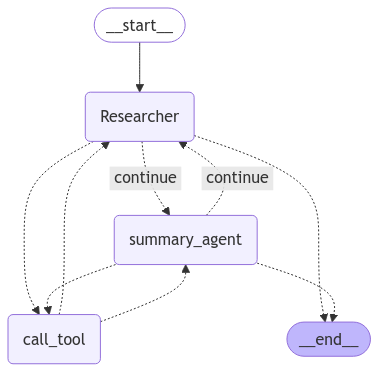

'\n- `graph.get_graph()`: Ruft den internen Graphen ab, der im Workflow definiert wurde.\n- `draw_mermaid_png()`: Wandelt den Graphen in eine PNG-Darstellung um, basierend auf Mermaid.js, einem Tool zur Diagrammerstellung.\n- `display()`: Zeigt die PNG-Datei im Jupyter-Notebook an.\n'

In [8]:
from IPython.display import Image, display  # Importiert Funktionen zur Anzeige von Bildern in Jupyter-Notebooks

# Zeige den Workflow-Graphen als Bild an
display(
    Image(
        graph.get_graph().draw_mermaid_png()  # Erstellt eine PNG-Darstellung des Graphen mit Mermaid.js
    )
)
"""
- `graph.get_graph()`: Ruft den internen Graphen ab, der im Workflow definiert wurde.
- `draw_mermaid_png()`: Wandelt den Graphen in eine PNG-Darstellung um, basierend auf Mermaid.js, einem Tool zur Diagrammerstellung.
- `display()`: Zeigt die PNG-Datei im Jupyter-Notebook an.
"""


Aufruf des Agenten

In [ ]:
# Starte den Workflow-Graphen und führe die Verarbeitung schrittweise aus
events = graph.stream(
    {
        # Initialer Zustand des Graphen mit einer Nachricht vom Nutzer (HumanMessage)
        "messages": [
            HumanMessage(
                content="Generate the latest research on Generative AI Security, and summarize a report on the latest research in the field."
            )
        ],
    },
    # Maximale Anzahl von Schritten, die im Graphen durchgeführt werden dürfen
    {"recursion_limit": 15},  # Legt ein Limit für die Rekursionstiefe fest, um Endlosschleifen zu vermeiden
)

# Iteriere über die Ereignisse (Events), die während der Graphenverarbeitung generiert werden
for s in events:
    print(s)
    print("----")  # Trennt die Ereignisse zur besseren Lesbarkeit


C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_9112\759352124.py:26: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)


{'Researcher': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_69x7', 'function': {'arguments': '{"query":"latest research on Generative AI Security"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 1387, 'total_tokens': 1480, 'completion_time': 0.146440139, 'prompt_time': 0.085695709, 'queue_time': 0.0013969980000000104, 'total_time': 0.232135848}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Researcher', id='run-be2ee5ee-3276-43e5-bdfa-1b0e896005bc-0', tool_calls=[{'name': 'search', 'args': {'query': 'latest research on Generative AI Security'}, 'id': 'call_69x7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1387, 'output_tokens': 93, 'total_tokens': 1480})], 'sender': 'Researcher'}}
----
{'call_tool': {'messages': [ToolMessage(content='{"result": "Over the last decade, Artificial In

C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_9112\759352124.py:26: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)


{'Researcher': {'messages': [AIMessage(content='Based on the tool output, the latest research on Generative AI Security highlights the increasing popularity of Generative AI and its applications in cybersecurity. However, the misuse of Generative AI platforms poses significant risks, including data breaches, model tampering, and malicious content generation. Organizations and security professionals must ensure the secure use of these platforms to protect sensitive data, maintain model integrity, and prevent adversarial attacks.\n\nA bibliometric analysis of 4,262 works published between 2020 and 2024 reveals that Generative AI is a rapidly growing subfield. Concerns about using Generative AI in organizations range from data security and governance to regulatory compliance.\n\nIn summary, while Generative AI offers promising opportunities for cybersecurity, it is crucial to prioritize securing these platforms and address concerns related to data security, governance, and regulatory comp

C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_9112\759352124.py:26: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)


{'summary_agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 2080, 'total_tokens': 2081, 'completion_time': 0.0, 'prompt_time': 0.159335897, 'queue_time': -9223372037.014112, 'total_time': 0.159335897}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, name='summary_agent', id='run-71a30664-62e0-4348-af93-f61bae5deada-0', usage_metadata={'input_tokens': 2080, 'output_tokens': 1, 'total_tokens': 2081})], 'sender': 'summary_agent'}}
----


C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_9112\759352124.py:26: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)


{'Researcher': {'messages': [AIMessage(content='I apologize, but I need more context or a specific question to provide a helpful response. I am here to assist you with any questions or tasks you have.\n\nIf you\'d like to know more about Generative AI Security, you can ask a question like, "Can you tell me more about the security concerns related to Generative AI?" or "What are some best practices for securing Generative AI platforms?"\n\nPlease let me know how I can help.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 2091, 'total_tokens': 2190, 'completion_time': 0.156660772, 'prompt_time': 0.098206228, 'queue_time': 0.0012246069999999887, 'total_time': 0.254867}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, name='Researcher', id='run-980c2d93-f729-4835-b8f7-1baa1b24b6f3-0', usage_metadata={'input_tokens': 2091, 'output_tokens': 99, 'total_tokens': 2190})], 

C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_9112\759352124.py:26: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)


{'summary_agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 2196, 'total_tokens': 2197, 'completion_time': 0.0, 'prompt_time': 0.205282182, 'queue_time': -9223372037.060059, 'total_time': 0.205282182}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, name='summary_agent', id='run-757d9fa6-e79b-480a-92ee-6c872037e614-0', usage_metadata={'input_tokens': 2196, 'output_tokens': 1, 'total_tokens': 2197})], 'sender': 'summary_agent'}}
----
